In [1]:
import sif_parser
import glob, os
import napari

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import skimage
import skimage.filters
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, remove_small_objects


from microfilm.microplot import microshow

In [8]:
files_path = "/Volumes/Transfer/OM_data/sandbox/test/20211126"
# files_path = "/Volumes/GroupNiggli/Ruben/OM_images_examples/10h-32m-47s.sif"
os.path.exists(files_path)

True

In [9]:
file_list = []
for files in glob.glob(files_path + "/**/" + "*.sif", recursive=True):
    file_list.append(files)
    # print(file_list)
    print(files)

/Volumes/Transfer/OM_data/sandbox/test/20211126/6737/Video Files/10h-32m-47s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6737/Video Files/10h-36m-42s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6737/Video Files/10h-39m-07s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6737/Video Files/10h-41m-34s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6737/Video Files/11h-16m-24s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6737/Video Files/11h-22m-46s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6737/Video Files/11h-25m-12s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6737/Video Files/11h-27m-32s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6740/Video Files/13h-43m-25s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6740/Video Files/13h-46m-30s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6740/Video Files/13h-49m-23s.sif
/Volumes/Transfer/OM_data/sandbox/test/20211126/6740/Video Files/13h-51m-50s.sif
/Volumes/Transfer/OM_data/sa

In [4]:
# file_list[7:9]

[]

In [4]:
# data, info = sif_parser.np_open(file_list[1])

In [ ]:
len(info)

In [6]:
info.popitem(0)

('SifVersion', 65567)

In [ ]:
dict(info)

In [24]:
info.popitem(0)

('SifVersion', 65567)

## Load a recording from your volume

In [5]:
viewer = napari.Viewer()

In [243]:
viewer.show()

In [10]:
viewer.open(path=file_list[7:8], plugin="napari-omaas")

[<Image layer '11h-27m-32s' at 0x1c9971580>]

/Users/rubencito/miniconda3/envs/omass_env/lib/python3.9/site-packages/napari_plot_profile/_dock_widget.py:259: RuntimeWarning: invalid value encountered in double_scalars
  relative_position = position_on_line / line_length


In [7]:
image_10slides = viewer.layers['image'].data[:20, : , :  ]

In [8]:
viewer.add_image(data = image_10slides, gamma= 0.2, name = "10s", colormap="twilight_shifted")

<Image layer '10s' at 0x1c89cb910>

In [9]:
viewer.layers['image'].data[0, : , :  ].shape


(370, 1950)

## ROIs selection & segemntation

In [244]:
one_frame = viewer.layers['image'].data[0, : , :  ]

KeyError: "'image' is not in list"

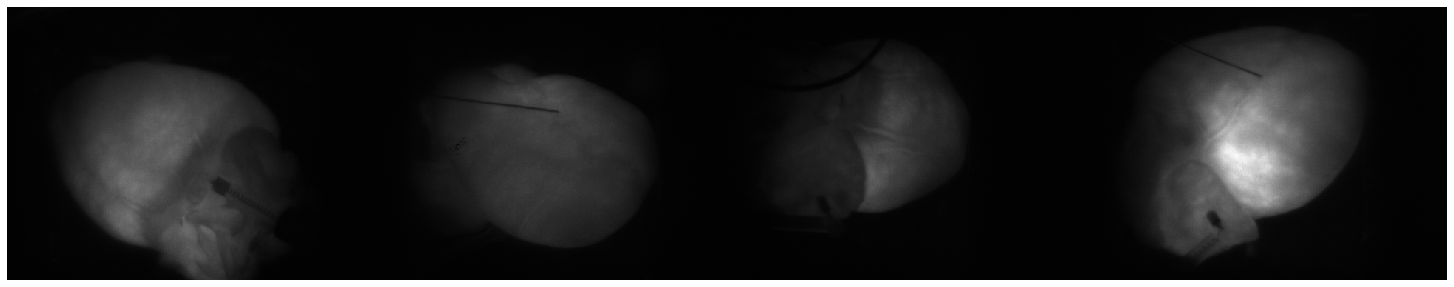

In [22]:
microshow(one_frame, fig_scaling=20)

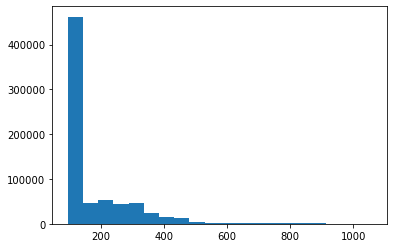

In [23]:
plt.hist(np.ravel(one_frame), bins=20);

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


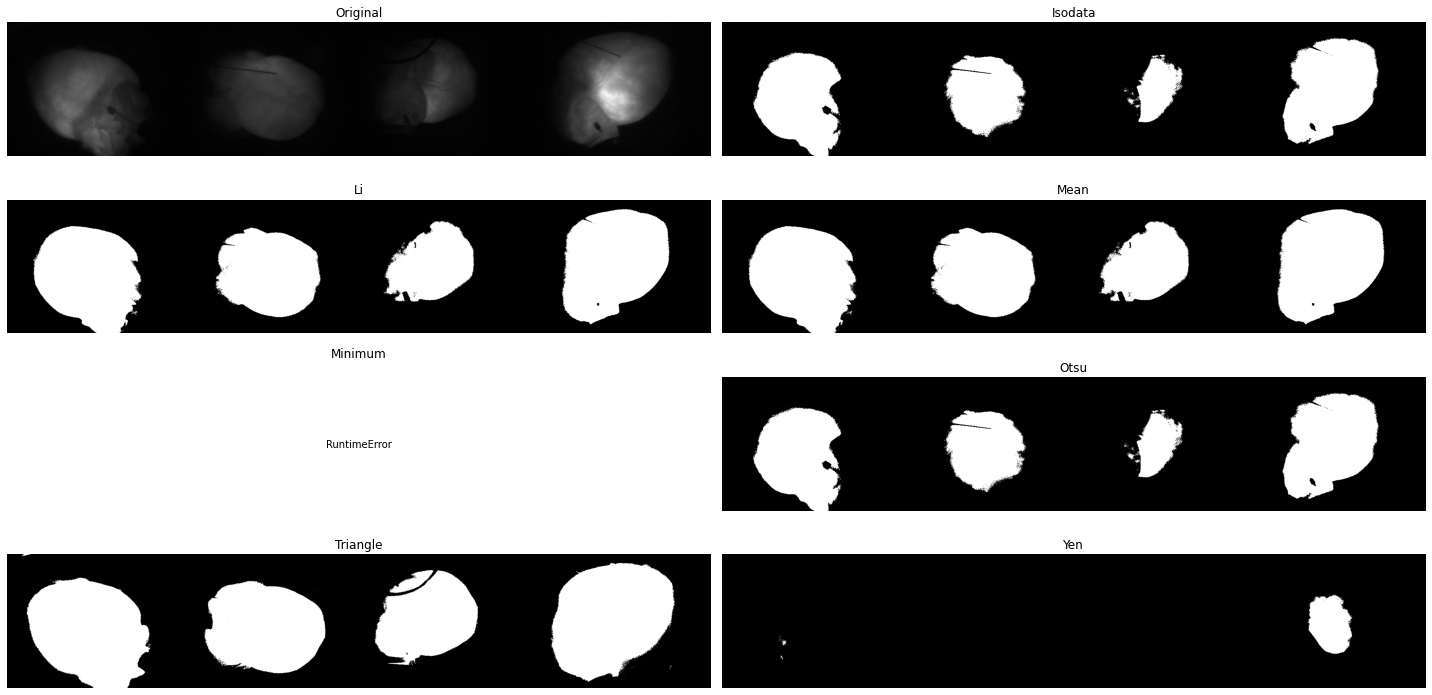

In [37]:
skimage.filters.try_all_threshold(one_frame, figsize=(20,10));

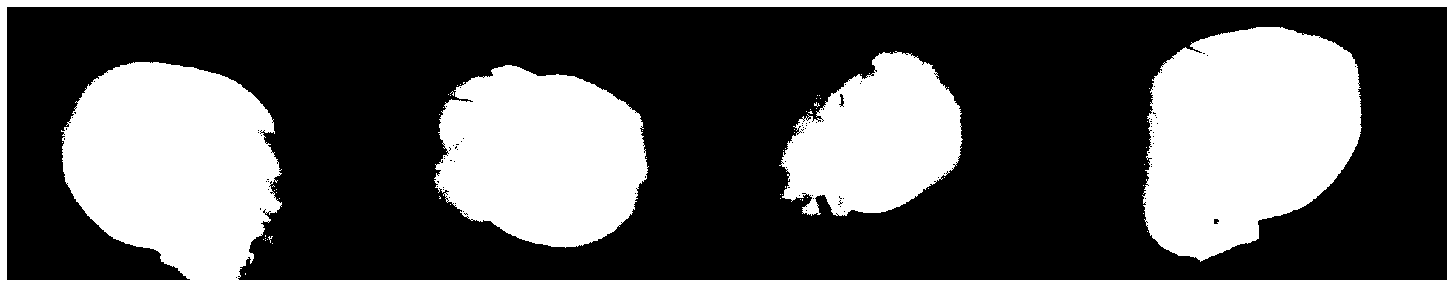

In [84]:
my_threshold = skimage.filters.threshold_mean(one_frame)
mask = one_frame > my_threshold
microshow(mask, fig_scaling=20)

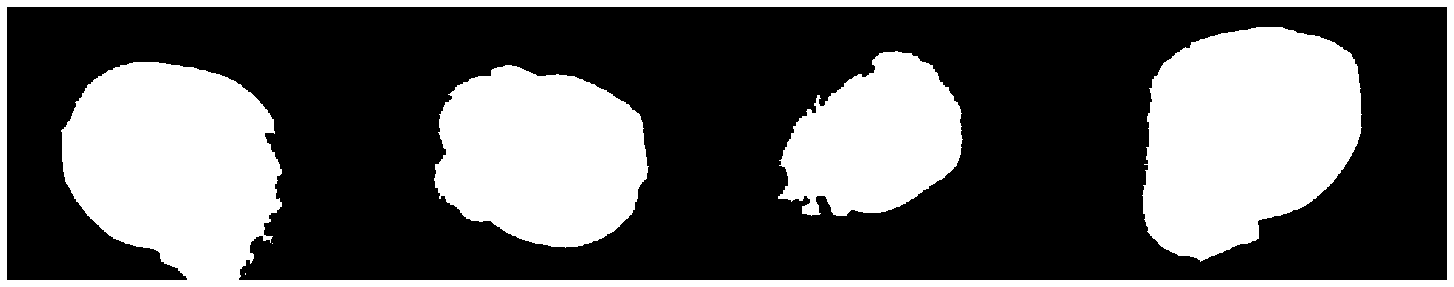

In [85]:
influence_region = np.ones((5,5))
image_fill = skimage.morphology.binary_closing(mask, footprint=influence_region)
microshow(image_fill, fig_scaling=20)

## create a function that return the masks

In [238]:
def return_masks(layer_name):
    
    one_frame = viewer.layers[str(layer_name)].data[0, : , :  ]
    # use mean trheshold for masking
    mask = one_frame > skimage.filters.threshold_mean(one_frame)
    
    # fill holes
    influence_region = np.ones((5,5))
    image_fill = skimage.morphology.binary_closing(mask, footprint=influence_region)
    label_image = label(image_fill)
    
    return label_image

In [239]:
return_masks(layer_name = "image")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [47]:
contours = skimage.measure.find_contours(image_fill, 0.8)

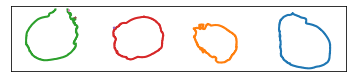

In [54]:
fig, ax = plt.subplots()
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [149]:
viewer.layers['Shapes'].data

[array([[250.        ,  69.95694345,  67.6000539 ],
        [250.        ,  69.95694345, 370.97648525],
        [250.        , 373.33337481, 370.97648525],
        [250.        , 373.33337481,  67.6000539 ]])]

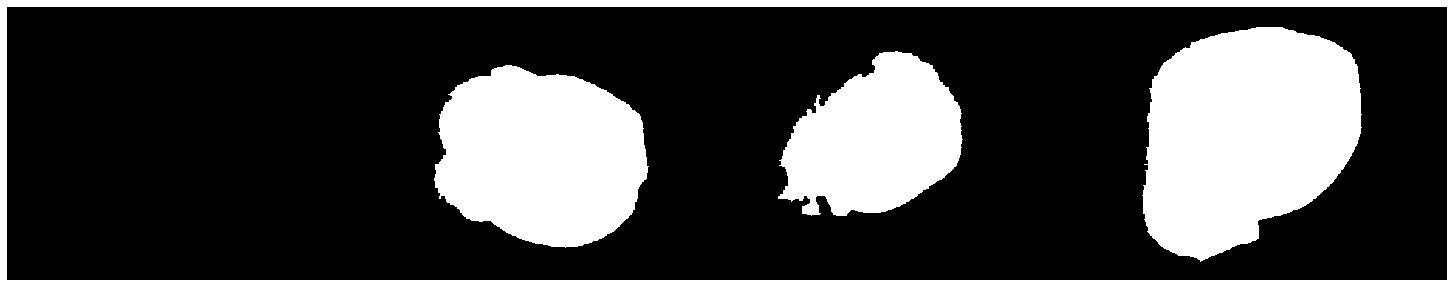

In [73]:
bw = closing(one_frame > my_otsu_threshold, square(5))
cleared = remove_small_objects(clear_border(bw), 20)
microshow(cleared, fig_scaling=20)

In [96]:

label_image = label(image_fill)
labels_layer = viewer.add_labels(label_image, name = "contours")

In [69]:
square(4)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

create regions square

In [134]:

props = regionprops(label_image)
props

In [138]:
props[1].area

38163

In [143]:
area = []
for region in props:
    area.append(region.area)
    
area 

[71109, 38163, 66032, 54941, 1, 1, 2]

In [141]:
area

[]

In [98]:

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox

In [114]:
minr, minc, maxr, maxc

(79, 578, 327, 869)

In [154]:
[np.array([[250, minr, minc],
           [250, minr, maxc],
           [250, maxr, maxc],
           [250, maxr, minc]])]

[array([[250,  79, 578],
        [250,  79, 869],
        [250, 327, 869],
        [250, 327, 578]])]

In [153]:
viewer.add_shapes(np.array([[250, minr, minc],
                             [250, minr, maxc],
                             [250, maxr, maxc],
                             [250, maxr, minc]], ), shape_type = "rectangle", name = "ROI1")

<Shapes layer 'ROI1' at 0x1d7b92ca0>

In [127]:
rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
rect

In [128]:
mpatches.Rectangle()

(578, 79)

In [155]:
viewer.layers['poligon'].data

[array([[ 250.        ,  100.64593249, 1539.20662365],
        [ 250.        ,  187.39203727, 1388.54233639],
        [ 250.        ,  260.44138867, 1393.10792086],
        [ 250.        ,  294.68327213, 1571.16571488],
        [ 250.        ,  212.50275181, 1863.36312046],
        [ 250.        ,  118.90827034, 1804.01052245],
        [ 250.        ,   89.23197133, 1721.83000213],
        [ 250.        ,   50.42450341, 1632.80110512]])]

In [174]:
contours

[array([[ 345.2, 1616. ],
        [ 345.2, 1615. ],
        [ 345. , 1614.8],
        ...,
        [ 344.2, 1617. ],
        [ 345. , 1616.2],
        [ 345.2, 1616. ]]),
 array([[ 283.2, 1126. ],
        [ 283. , 1125.8],
        [ 282.2, 1125. ],
        ...,
        [ 282.2, 1127. ],
        [ 283. , 1126.2],
        [ 283.2, 1126. ]]),
 array([[369. , 243.8],
        [368. , 243.8],
        [367. , 243.8],
        ...,
        [367. , 313.2],
        [368. , 313.2],
        [369. , 313.2]]),
 array([[326.2, 756. ],
        [326. , 755.8],
        [325.2, 755. ],
        ...,
        [325.2, 757. ],
        [326. , 756.2],
        [326.2, 756. ]]),
 array([[262.2, 583. ],
        [262. , 582.8],
        [261.8, 583. ],
        [262. , 583.2],
        [262.2, 583. ]]),
 array([[320.2, 359. ],
        [320. , 358.8],
        [319.8, 359. ],
        [320. , 359.2],
        [320.2, 359. ]]),
 array([[362.2, 322. ],
        [362. , 321.8],
        [361. , 321.8],
        [360.8, 322. ],


In [167]:
np.insert(contours, 250, axis=1)

TypeError: _insert_dispatcher() missing 1 required positional argument: 'values'

In [172]:
contours.insert(250)

TypeError: insert expected 2 arguments, got 1

In [176]:
np.insert(contours, 0, 100, axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [187]:
np.insert(contours, 2, , axis=0)

IndexError: list index out of range

In [188]:
arr1 = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9), (50, 51, 52)])
arr1

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [50, 51, 52]])

In [206]:
np.insert(arr1, 0, [[50], [10] ], axis=1)

array([[50, 10,  1,  2,  3],
       [50, 10,  4,  5,  6],
       [50, 10,  7,  8,  9],
       [50, 10, 50, 51, 52]])

In [229]:
np.insert(contours, 0, np.full(shape=(7), fill_value=250), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [232]:
contours

[array([[ 345.2, 1616. ],
        [ 345.2, 1615. ],
        [ 345. , 1614.8],
        ...,
        [ 344.2, 1617. ],
        [ 345. , 1616.2],
        [ 345.2, 1616. ]]),
 array([[ 283.2, 1126. ],
        [ 283. , 1125.8],
        [ 282.2, 1125. ],
        ...,
        [ 282.2, 1127. ],
        [ 283. , 1126.2],
        [ 283.2, 1126. ]]),
 array([[369. , 243.8],
        [368. , 243.8],
        [367. , 243.8],
        ...,
        [367. , 313.2],
        [368. , 313.2],
        [369. , 313.2]]),
 array([[326.2, 756. ],
        [326. , 755.8],
        [325.2, 755. ],
        ...,
        [325.2, 757. ],
        [326. , 756.2],
        [326.2, 756. ]]),
 array([[262.2, 583. ],
        [262. , 582.8],
        [261.8, 583. ],
        [262. , 583.2],
        [262.2, 583. ]]),
 array([[320.2, 359. ],
        [320. , 358.8],
        [319.8, 359. ],
        [320. , 359.2],
        [320.2, 359. ]]),
 array([[362.2, 322. ],
        [362. , 321.8],
        [361. , 321.8],
        [360.8, 322. ],


In [226]:
np.full(shape=(7,1), fill_value=250)

array([[250],
       [250],
       [250],
       [250],
       [250],
       [250],
       [250]])